<a href="https://colab.research.google.com/github/szn5400/CO2_all/blob/main/STT_pressure_git_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This is code for Gas Saturation output for 500 epochs 
# Data is shuffled
# Rescaling done with data from the full dataset

import sys
sys.path.append('/content/drive/MyDrive/code/MLP')

from read_data import read
import os
import numpy as np
import glob
import collections
from read_model import MLP_single
from data_to_numpy import numpy_single


#read data
all_pressures,all_saturations,all_permeabilities,all_porosities,all_surf_inj_rate_series,all_surf_prod_rate_series,Ks,Rs,saturations_min,saturations_max,pressure_min,pressure_max,surf_prod_rate_series_max,surf_prod_rate_series_min = read()

#convert to numpy
features1_tr,target1_tr,features1_te,target1_te = numpy_single(all_pressures,all_saturations,all_permeabilities,all_porosities,all_surf_inj_rate_series,all_surf_prod_rate_series,Ks,Rs,all_pressures)



#train model MLP
batch_size = 250
model = MLP_single()

history = model.fit(features1_tr, target1_tr, epochs=500, batch_size=250,shuffle=True, verbose=1)

model.evaluate(features1_te,target1_te)

All files: ['/content/drive/MyDrive/data/k1r1-h.out', '/content/drive/MyDrive/data/k1r2-h.out', '/content/drive/MyDrive/data/k1r3-h.out', '/content/drive/MyDrive/data/k1r4-h.out', '/content/drive/MyDrive/data/k1r5-h.out', '/content/drive/MyDrive/data/k1r6-h.out', '/content/drive/MyDrive/data/k1r7-h.out', '/content/drive/MyDrive/data/k1r8-h.out', '/content/drive/MyDrive/data/k1r9-h.out', '/content/drive/MyDrive/data/k2r1-h.out', '/content/drive/MyDrive/data/k2r2-h.out', '/content/drive/MyDrive/data/k2r3-h.out', '/content/drive/MyDrive/data/k2r4-h.out', '/content/drive/MyDrive/data/k2r5-h.out', '/content/drive/MyDrive/data/k2r6-h.out', '/content/drive/MyDrive/data/k2r7-h.out', '/content/drive/MyDrive/data/k2r8-h.out', '/content/drive/MyDrive/data/k2r9-h.out', '/content/drive/MyDrive/data/k3r1-h.out', '/content/drive/MyDrive/data/k3r2-h.out', '/content/drive/MyDrive/data/k3r3-h.out', '/content/drive/MyDrive/data/k3r4-h.out', '/content/drive/MyDrive/data/k3r5-h.out', '/content/drive/MyDriv

[1.2692923519352917e-05, 0.0025683597195893526]

In [2]:
model.evaluate(features1_te,target1_te)

12481/12481 [==============================] - 21s 2ms/step - loss: 1.2693e-05 - mae: 0.0026


[1.2692923519352917e-05, 0.0025683597195893526]

In [3]:
model_json = model.to_json()
with open("model_git_500_shuf_STT_pressure.json","w") as file:
    file.write(model_json)
    
model.save_weights("weights_git_500_shuf_STT_pressure.h5")

In [4]:
pressure_pred = model.predict(features1_te)

In [5]:
len_pressure_pred = len(pressure_pred)
pressure_predicted = [0]*len_pressure_pred
pressure_original = [0]*len_pressure_pred
error_pressure = [0]*len_pressure_pred
Error_pressure = 0
for i in range(len_pressure_pred):
  pressure_original[i] = (target1_te[i]*(pressure_max-pressure_min))+pressure_min
  pressure_predicted[i] = (pressure_pred[i]*(pressure_max-pressure_min))+pressure_min  
  error_pressure[i] = abs(pressure_original[i]-pressure_predicted[i])
  error_pressure_mse = pow((pressure_original[i]-pressure_predicted[i]),2)
  Error_pressure+=error_pressure_mse
Error_pressure_mse = Error_pressure/len_pressure_pred
print("Mse error for pressure saturation:",Error_pressure_mse)

Mse error for pressure saturation: [310.46703546]


In [6]:
import matplotlib.pyplot as plt
x = np.linspace(start=0,stop=10,num=len(target1_te))

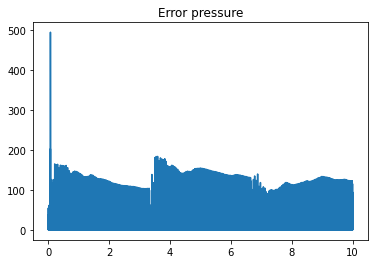

In [7]:
plt.plot(x,error_pressure)
plt.title("Error pressure")
plt.show()